In [1]:
import numpy as np
import matplotlib.pyplot as plt

import net

In [2]:
# create data

def class1(u):
    x1 = 2 + np.sin(0.2*u + 8) * np.sqrt(u + 10)
    x2 = -1 + np.cos(0.2*u + 8) * np.sqrt(u + 10)
    return x1, x2

def class2(u):
    x1 = 2 + np.sin(0.2*u - 8) * np.sqrt(u + 10)
    x2 = -1 + np.cos(0.2*u - 8) * np.sqrt(u + 10)
    return x1, x2

data1 = np.array([class1(u+1) for u in np.linspace(-10, 30, 401)])
data2 = np.array([class2(u+1) for u in np.linspace(-10, 30, 401)])

labels1 = np.array([1 for x in data1]).reshape(-1,1)
labels2 = np.array([-1 for x in data2]).reshape(-1,1)

In [3]:
print(data1.shape)
print(data2.shape)
print(labels1.shape)
print(labels2.shape)

(401, 2)
(401, 2)
(401, 1)
(401, 1)


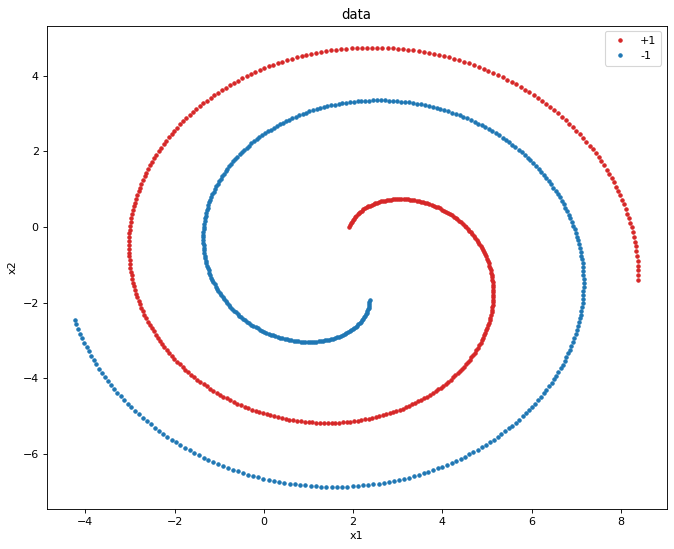

In [4]:
# visualize data

fig, ax = plt.subplots(figsize=(10,8), dpi=80)
ax.plot(data1.T[0], data1.T[1], ".", c="tab:red", label="+1")
ax.plot(data2.T[0], data2.T[1], ".", c="tab:blue", label="-1")
plt.title("data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="best")
plt.show()

In [5]:
data = np.concatenate((data1, data2))
labels = np.concatenate((labels1, labels2))

In [6]:
network = net.Net(layers=[
    net.Layer(2, 20, activation=net.softplus),
    net.Layer(20, 10 ,activation=net.softplus),
    net.Layer(10, 1, activation=net.tanh)
], lr=5e-4, loss=net.mse)

network

Net((2, 20, 10, 1), lr=0.0005, loss=<function mse at 0x7fa1b0b78a60>)

In [7]:
epochs = 20

batch_losses, epoch_losses, time = network.train(data, labels, epochs=epochs, batch_size=100, multiplier=100)

training...

epoch 1/20
(100.0%) [================================] - loss: 0.771                                           
epoch 2/20
(100.0%) [================================] - loss: 0.551                                           
epoch 3/20
(100.0%) [================================] - loss: 0.328                                           
epoch 4/20
(100.0%) [================================] - loss: 0.149                                           
epoch 5/20
(100.0%) [================================] - loss: 0.148                                           
epoch 6/20
(100.0%) [================================] - loss: 0.098                                           
epoch 7/20
(100.0%) [================================] - loss: 0.100                                           
epoch 8/20
(100.0%) [================================] - loss: 0.042                                           
epoch 9/20
(100.0%) [================================] - loss: 0.025                       

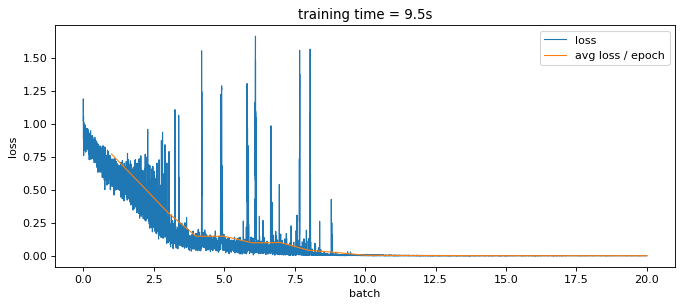

In [8]:
fig, ax = plt.subplots(figsize=(10,4), dpi=80)
ax.plot(np.linspace(0, epochs, len(batch_losses), endpoint=False), batch_losses, label="loss", lw=1)
ax.plot(np.linspace(1, epochs, epochs, endpoint=True), epoch_losses, label="avg loss / epoch", lw=1)
ax.set_title(f"training time = {str(time)[:3]}s")
ax.set_xlabel("batch")
ax.set_ylabel("loss")
ax.legend(loc="best")
plt.show()

In [9]:
x_data = data.T[0]
x_min = int(np.floor(np.min(x_data)))
x_max = int(np.ceil(np.max(x_data)))
x_range = x_max - x_min

y_data = data.T[1]
y_min = int(np.floor(np.min(y_data)))
y_max = int(np.ceil(np.max(y_data)))
y_range = y_max - y_min

print("x:", x_min, x_max, x_range)
print("y:", y_min, y_max, y_range)

x: -5 9 14
y: -7 5 12


In [10]:
# plot net outputs

xs = np.linspace(x_min, x_max, x_range*10+1)
ys = np.linspace(y_min, y_max, y_range*10+1)

img = []
for y in ys:
    row = []
    for x in xs:
        inputs = np.array([x, y])
        row.append(network(inputs))
    img.append(row)
img = np.array(img, np.float32).reshape(y_range*10+1, x_range*10+1)

print(img.shape)

(121, 141)


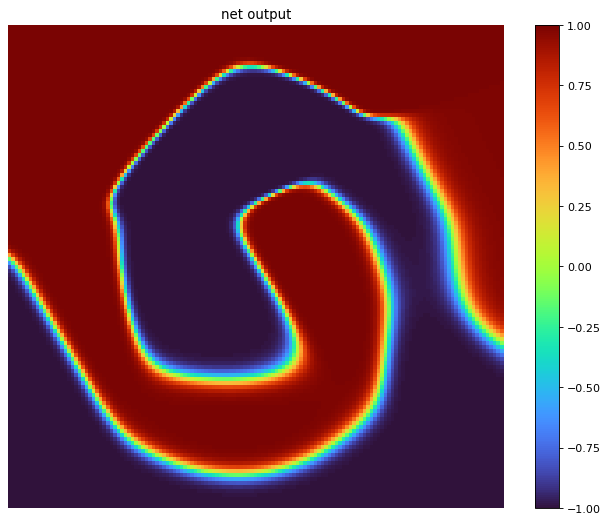

In [11]:
fig, ax = plt.subplots(figsize=(10,8), dpi=80)
im = ax.pcolormesh(xs, ys, img, shading='auto', cmap="turbo")
# ax.plot(data1.T[0], data1.T[1], ".", c="tab:red", label="+1") # uncomment to see labels
# ax.plot(data2.T[0], data2.T[1], ".", c="tab:blue", label="-1") # uncomment to see labels
ax.axis("off")
ax.set_title("net output")
fig.colorbar(im, ax=ax)
plt.show()